In [78]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
insurance=pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Feature Scaling and One-hot encoding using make_column_transfer

In [109]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder

# Create a column transformer
ct=make_column_transformer(
    (StandardScaler(),['age','bmi','children']),
    (OneHotEncoder(handle_unknown='ignore'),['sex','smoker','region'])
)

In [110]:
# Create X & y values(features and labels)
X=insurance.drop('charges',axis=1)
y=insurance['charges']

# Create training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [111]:
# Fit the column transfer to our training data
ct.fit(X_train)

# Transform training and test data with normalization and one-hot encoder
X_train_normal=ct.transform(X_train)
X_test_normal=ct.transform(X_test)
X_train.shape,X_train_normal.shape

((1070, 6), (1070, 11))

# Create deep neural network using following steps:
1. Create a Sequential model consisting information about the no. of neurons in hidden layers and output layer
2. Compile the model setting the optimizer to update the weights and loss function
3. Fit the model for the training sets for a certain epochs
> **Question**: How long should we train for?
TensorFlow has a solution! it's called the [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow component. We can add to our model to stop training once it stops improving a certain metric.

In [113]:
tf.random.set_seed(42)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
# 1. Create a model
insurance_model=tf.keras.Sequential([
  # Hidden Layer consisting of 100 neurons                                
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(100),
  # Output layer of 1 neuron
  tf.keras.layers.Dense(1)   
  # N.B: We don't need to specify input_shape as it can be automatically handeled by keras                           
])

# 2.Compile a model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                        metrics=["mae"])

# 3. Fit the model
history=insurance_model.fit(X_train_normal,y_train,epochs=1000, callbacks=[callback])

Epoch 1/1000
34/34 [==============================] - 0s 2ms/step - loss: 13341.6504 - mae: 13341.6504
Epoch 2/1000
34/34 [==============================] - 0s 2ms/step - loss: 13314.1484 - mae: 13314.1484
Epoch 3/1000
34/34 [==============================] - 0s 2ms/step - loss: 13216.7217 - mae: 13216.7217
Epoch 4/1000
34/34 [==============================] - 0s 3ms/step - loss: 12975.7520 - mae: 12975.7520
Epoch 5/1000
34/34 [==============================] - 0s 2ms/step - loss: 12507.8359 - mae: 12507.8359
Epoch 6/1000
34/34 [==============================] - 0s 2ms/step - loss: 11750.1543 - mae: 11750.1543
Epoch 7/1000
34/34 [==============================] - 0s 2ms/step - loss: 10792.8174 - mae: 10792.8174
Epoch 8/1000
34/34 [==============================] - 0s 2ms/step - loss: 9732.9229 - mae: 9732.9229
Epoch 9/1000
34/34 [==============================] - 0s 2ms/step - loss: 8719.9150 - mae: 8719.9150
Epoch 10/1000
34/34 [==============================] - 0s 2ms/step - loss: 79

# Model summary

In [114]:
insurance_model.summary()

Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_152 (Dense)            (None, 100)               1200      
_________________________________________________________________
dense_153 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_154 (Dense)            (None, 1)                 101       
Total params: 11,401
Trainable params: 11,401
Non-trainable params: 0
_________________________________________________________________


# Evalute the model for the test set

In [115]:
# Evaluate the model on test data
insurance_model.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3159.2329 - mae: 3159.2329


[3159.23291015625, 3159.23291015625]

# Visualizing the training loss curve

Text(0, 0.5, 'Loss')

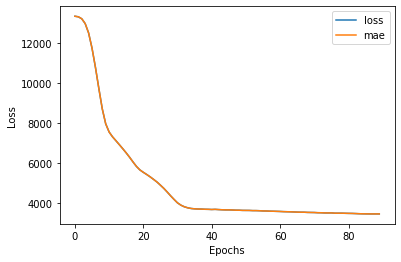

In [116]:
pd.DataFrame(history.history).plot()
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Saving model using-
1. The SavedModel format
2. The HDF5 format

In [117]:
insurance_model.save('insurance_model_savedModel_format')

INFO:tensorflow:Assets written to: insurance_model_savedModel_format/assets


In [118]:
insurance_model.save('insurance_model_HDF5_format.h5')

# Loading the saved model

In [119]:
loaded_SavedModel_format=tf.keras.models.load_model('insurance_model_savedModel_format')
loaded_SavedModel_format.summary()

Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_152 (Dense)            (None, 100)               1200      
_________________________________________________________________
dense_153 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_154 (Dense)            (None, 1)                 101       
Total params: 11,401
Trainable params: 11,401
Non-trainable params: 0
_________________________________________________________________


In [120]:
loaded_SavedModel_format.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3159.2329 - mae: 3159.2329


[3159.23291015625, 3159.23291015625]

# Download a saved model from google colab

In [121]:
from google.colab import files
files.download('insurance_model_HDF5_format.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>